# Data 1030 Project

## Name: Jimmy Lin

## Link to your project github repo: (https://github.com/sirjimmylin/DATA-1030-Project.git)

## How long did you work on this project? 3.5 hours

Make sure you are in the DATA1030 environment.

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


## Step 1: EDA

In [2]:
import pandas as pd
import numpy as np

#read in txt file using pandas read_csv function with a tab delimiter
df = pd.read_csv('hcvdat0.csv')

#display the first few rows of the table
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
#Number of rows and columns in the dataset (rows,columns)
print(df.shape)

# Print the data types
print(df.dtypes.to_string())

print(df['Category'].value_counts())
print('This column is ordinal.')

(615, 14)
Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64
This column is ordinal.


In [4]:
correct_order = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']

df['Category'].value_counts().reindex(correct_order)

Category
0=Blood Donor             533
0s=suspect Blood Donor      7
1=Hepatitis                24
2=Fibrosis                 21
3=Cirrhosis                30
Name: count, dtype: int64

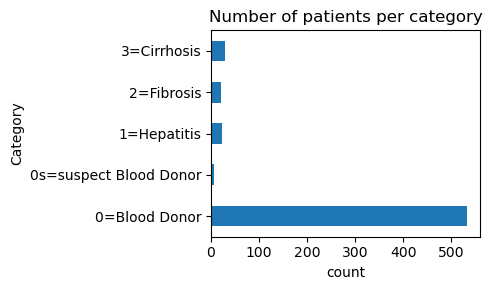

In [5]:
# import pandas as pd
# import numpy as np
# import matplotlib
from matplotlib import pylab as plt

plt.figure(figsize=(5,3))

df['Category'].value_counts().reindex(correct_order).plot.barh()
plt.xlabel('count')
plt.ylabel('Category')
plt.title('Number of patients per category')
plt.tight_layout()
plt.show()

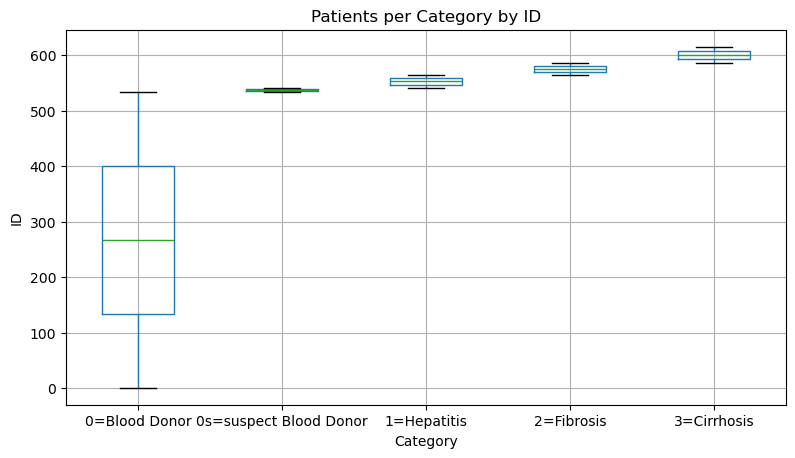

This box plot groups the ID by category.


In [6]:
df[['Category','Unnamed: 0']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by ID')
plt.xlabel('Category')
plt.ylabel('ID')
plt.show()
print('This box plot groups the ID by category.')

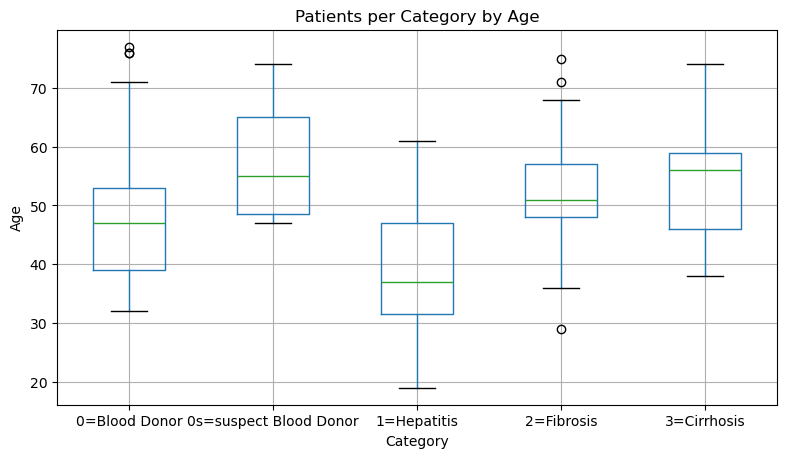

This box plot groups the age by category.


In [7]:
df[['Category','Age']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Age')
plt.xlabel('Category')
plt.ylabel('Age')
plt.show()
print('This box plot groups the age by category.')

In [8]:
count_matrix = df.groupby(['Category', 'Sex']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Sex                       f    m
Category                        
0=Blood Donor           215  318
0s=suspect Blood Donor    1    6
1=Hepatitis               4   20
2=Fibrosis                8   13
3=Cirrhosis              10   20
Sex                            f         m
Category                                  
0=Blood Donor           0.403377  0.596623
0s=suspect Blood Donor  0.142857  0.857143
1=Hepatitis             0.166667  0.833333
2=Fibrosis              0.380952  0.619048
3=Cirrhosis             0.333333  0.666667


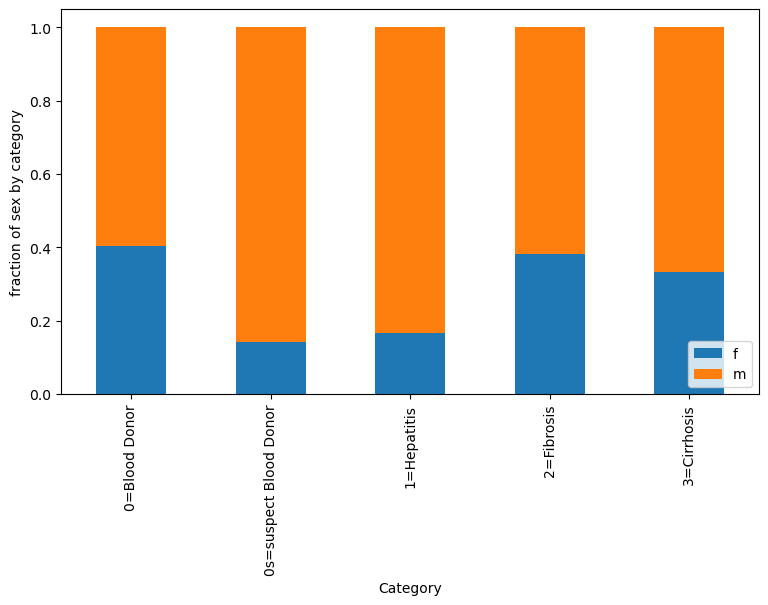

In [9]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(9,5))
plt.ylabel('fraction of sex by category')
plt.legend(loc=4)
plt.show()

In [10]:
count_matrix = df.groupby(['Sex', 'Category']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Category  0=Blood Donor  0s=suspect Blood Donor  1=Hepatitis  2=Fibrosis  \
Sex                                                                        
f                   215                       1            4           8   
m                   318                       6           20          13   

Category  3=Cirrhosis  
Sex                    
f                  10  
m                  20  
Category  0=Blood Donor  0s=suspect Blood Donor  1=Hepatitis  2=Fibrosis  \
Sex                                                                        
f              0.903361                0.004202     0.016807    0.033613   
m              0.843501                0.015915     0.053050    0.034483   

Category  3=Cirrhosis  
Sex                    
f            0.042017  
m            0.053050  


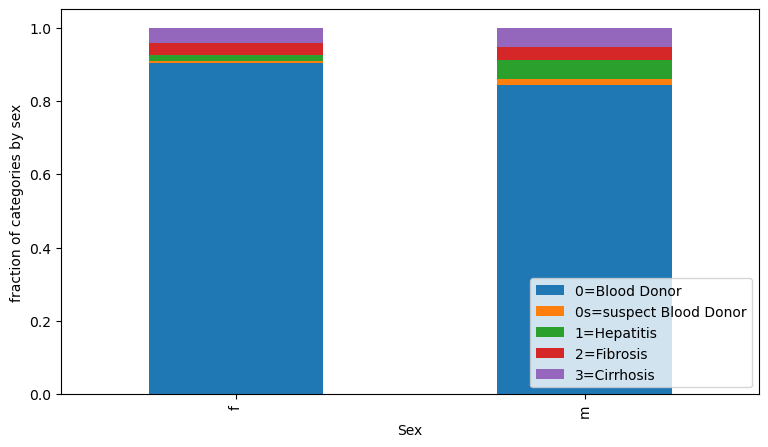

In [11]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(9,5))
plt.ylabel('fraction of categories by sex')
plt.legend(loc=4)
plt.show()

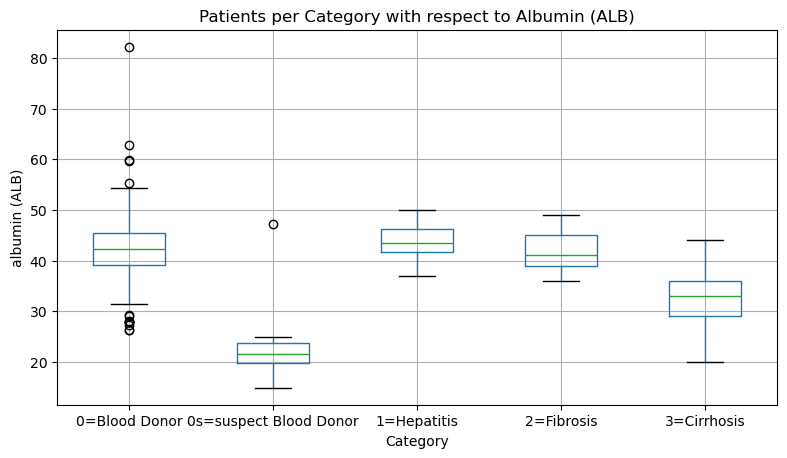

This box plot groups the albumin (ALB) by category.


In [12]:
df[['Category','ALB']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category with respect to Albumin (ALB)')
plt.xlabel('Category')
plt.ylabel('albumin (ALB)')
plt.show()
print('This box plot groups the albumin (ALB) by category.')

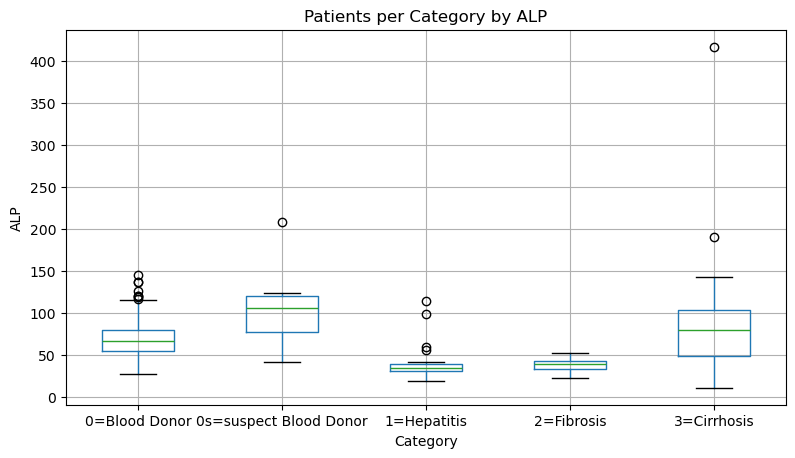

This box plot groups the ALP by category.


In [13]:
df[['Category','ALP']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by ALP')
plt.xlabel('Category')
plt.ylabel('ALP')
plt.show()
print('This box plot groups the ALP by category.')

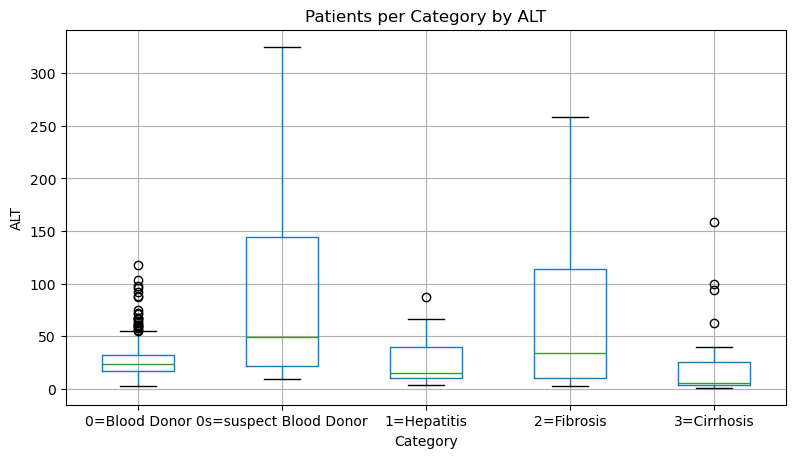

This box plot groups the ALT by category.


In [14]:
df[['Category','ALT']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by ALT')
plt.xlabel('Category')
plt.ylabel('ALT')
plt.show()
print('This box plot groups the ALT by category.')

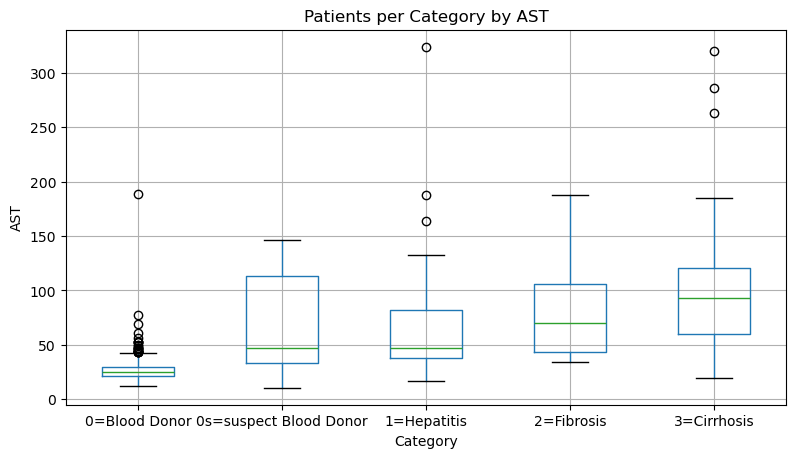

This box plot groups the AST by category.


In [15]:
df[['Category','AST']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by AST')
plt.xlabel('Category')
plt.ylabel('AST')
plt.show()
print('This box plot groups the AST by category.')

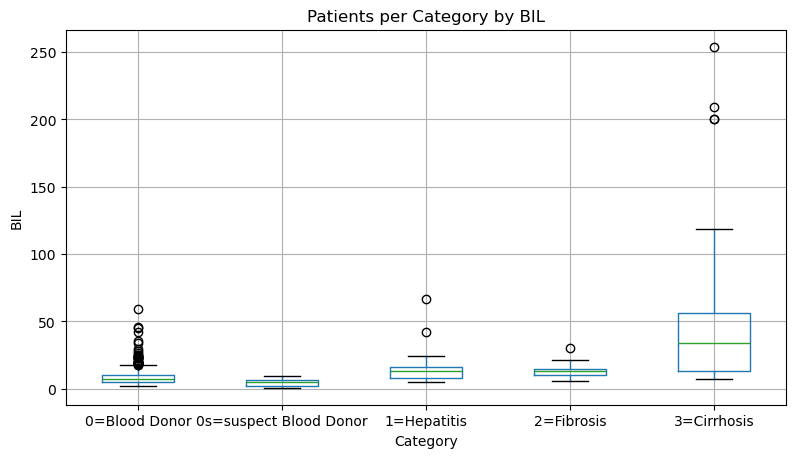

This box plot groups the BIL by category.


In [16]:
df[['Category','BIL']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by BIL')
plt.xlabel('Category')
plt.ylabel('BIL')
plt.show()
print('This box plot groups the BIL by category.')

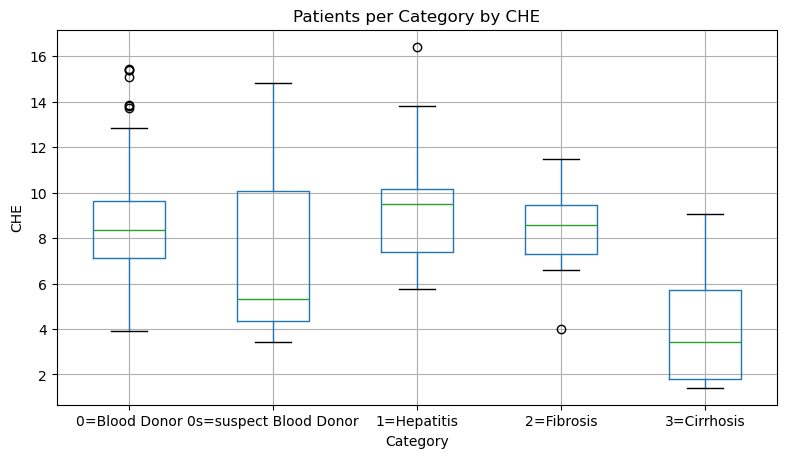

This box plot groups the CHE by category.


In [17]:
df[['Category','CHE']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by CHE')
plt.xlabel('Category')
plt.ylabel('CHE')
plt.show()
print('This box plot groups the CHE by category.')

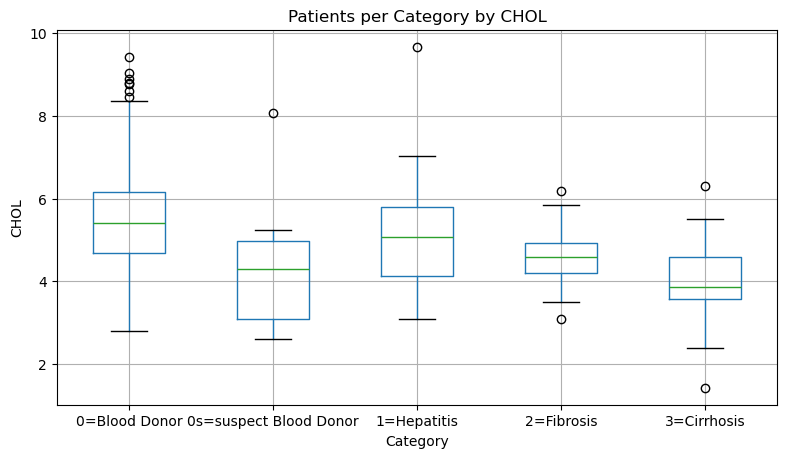

This box plot groups the CHOL by category.


In [18]:
df[['Category','CHOL']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by CHOL')
plt.xlabel('Category')
plt.ylabel('CHOL')
plt.show()
print('This box plot groups the CHOL by category.')

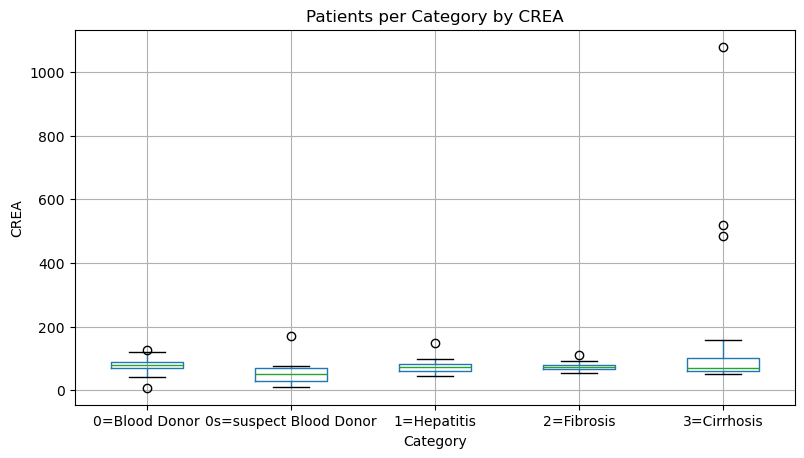

This box plot groups the CREA by category.


In [19]:
df[['Category','CREA']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by CREA')
plt.xlabel('Category')
plt.ylabel('CREA')
plt.show()
print('This box plot groups the CREA by category.')

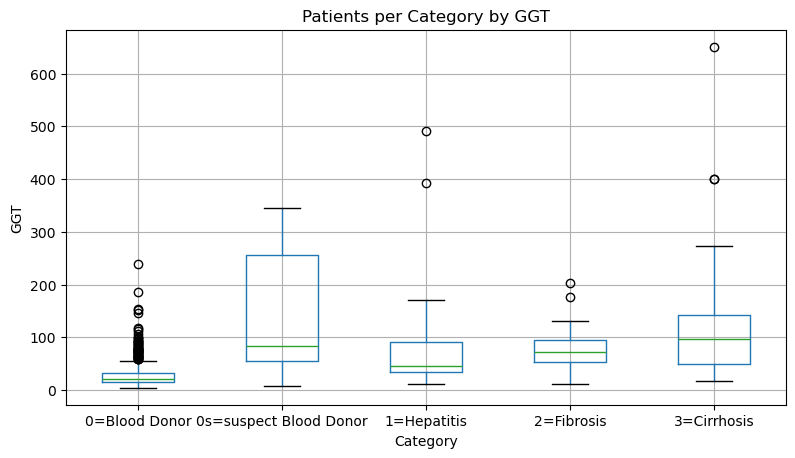

This box plot groups the GGT by category.


In [20]:
df[['Category','GGT']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by GGT')
plt.xlabel('Category')
plt.ylabel('GGT')
plt.show()
print('This box plot groups the GGT by category.')

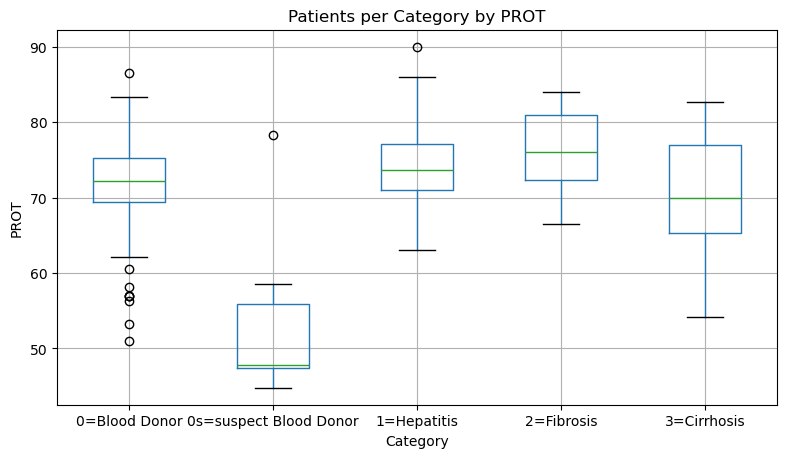

This box plot groups the PROT by category.


In [21]:
df[['Category','PROT']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by PROT')
plt.xlabel('Category')
plt.ylabel('PROT')
plt.show()
print('This box plot groups the PROT by category.')

In [22]:
# corr_matrix = df.corr(method='pearson', min_periods=1, numeric_only=False)
# corr_matrix

## Step 2: Splitting the Data

In [23]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold

# X = df.drop(columns=['Category','Unnamed: 0'])
# y = df['Category']

# def StratifiedSplit(X,y,random_state,test_size,n_splits):
#     # stratified train-test split
#     X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = test_size,stratify=y,random_state=random_state)

#     # do StratifiedKFold split on other
#     kf = StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=random_state)
#     for train_index, val_index in kf.split(X_other,y_other):
#         X_train = X_other.iloc[train_index]
#         y_train = y_other.iloc[train_index]
#         X_val = X_other.iloc[val_index]
#         y_val = y_other.iloc[val_index]
#         print(f"Train set:\n{X_train,y_train}\n")
#         print(f"Validation set:\n{X_val,y_val}\n")
#         print(f"Test set:\n{X_test,y_test}\n")
#         print("--------------------")
    

# StratifiedSplit(X,y,42,0.2,4)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df.drop(columns=['Category','Unnamed: 0'])
y = df['Category']

def StratifiedSplit(X, y, random_state, test_size, n_splits):
    # stratified train-test split
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

    # do StratifiedKFold split on other
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_index, val_index in kf.split(X_other, y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        
        print("Train set:")
        print(X_train)
        print(y_train)
        print("\nValidation set:")
        print(X_val)
        print(y_val)
        print("\nTest set:")
        print(X_test)
        print(y_test)
        print("--------------------")
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Call the function
X_train, y_train, X_val, y_val, X_test, y_test = StratifiedSplit(X, y, random_state=42, test_size=0.2, n_splits=5)

# Now you can print X_train and y_train separately
print("Final X_train:")
print(X_train)
print("\nFinal y_train:")
print(y_train)


Train set:
     Age Sex   ALB   ALP   ALT    AST    BIL   CHE  CHOL  CREA    GGT  PROT
441   49   f  39.3  59.4  18.3   15.0    4.8  8.03  4.58  83.0   12.5  74.3
216   52   m  82.2  82.2  37.0   23.7    7.8  8.90  6.09  77.0   87.8  67.4
605   42   f  33.0  79.0   3.7   55.7  200.0  1.72  5.16  89.1  146.3  69.9
341   34   f  39.7  39.3  11.2   16.4    8.4  5.27  4.68  61.0   24.3  71.5
595   56   m  27.0  81.1  17.0  319.8   37.0  1.42  3.54  66.9   93.7  65.3
..   ...  ..   ...   ...   ...    ...    ...   ...   ...   ...    ...   ...
432   48   f  43.7  50.1  17.3   26.3    8.1  8.15  5.38  64.0   13.4  73.1
27    34   m  29.0  41.6  29.1   16.1    4.8  6.82  4.03  62.0   14.5  53.2
561   41   f  37.0  31.2   8.2   38.3    7.0  7.08  5.30  60.8   24.7  82.4
63    37   m  50.4  48.5  19.4   27.5   11.6  5.78  4.93  90.0   27.8  75.0
347   35   f  42.0  69.0  19.9   16.6   10.8  7.85  4.43  67.0   15.1  64.1

[393 rows x 12 columns]
441    0=Blood Donor
216    0=Blood Donor
605      3

## Step 3: Preprocessing the Data

In [25]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# #np.random.seed(0)

# df = pd.read_csv('hcvdat0.csv')

# # let's separate the feature matrix X, and target variable y
# y = df['Category'] # remember, we want to predict who earns more than 50k or less than 50k
# X = df.loc[:, df.columns != 'Category'] # all other columns are features

# random_state = 42

# # first split to separate out the training set
# X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

# # second split to separate out the validation and test sets
# X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

# print(X_train)
# print(y_train)

In [26]:
# collect which encoder to use on each feature
# needs to be done manually
ordinal_ftrs = [] 
ordinal_cats = []
onehot_ftrs = ['Sex']
minmax_ftrs = ['Age']
std_ftrs = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
print(X_val_prep)
print(X_test_prep)

(394, 12)
(394, 13)
[[ 0.          1.          0.17241379 ... -0.06315518 -0.06218382
   3.26560493]
 [ 1.          0.          0.24137931 ... -0.26021036 -0.38663137
  -0.08841833]
 [ 0.          1.          0.56896552 ... -0.09599771  0.87964108
  -0.80971365]
 ...
 [ 0.          1.          0.25862069 ... -0.34231669 -0.47933068
  -3.37031205]
 [ 1.          0.          0.37931034 ... -0.36202221 -0.2902241
   1.89514381]
 [ 0.          1.          0.31034483 ...  0.11747873 -0.23275053
   0.56074746]]
[[ 1.          0.          0.51724138 ...  0.00252988 -0.5164104
   0.43452078]
 [ 1.          0.          0.25862069 ... -0.35873795 -0.29764005
  -0.07038594]
 [ 0.          1.          0.31034483 ...  0.28169138 -0.5553441
  -0.46709837]
 ...
 [ 0.          1.          0.27586207 ... -0.27663163 -0.22718858
   0.38042363]
 [ 0.          1.          0.62068966 ...  0.18316379  0.04720135
  -0.32283931]
 [ 1.          0.          0.27586207 ... -0.26021036 -0.46820676
  -1.40478229]]

**1. Drop the columns with missing values:**

In [27]:
import pandas as pd
import numpy as np

#read in txt file using pandas read_csv function with a tab delimiter

#print the shape of the original dataset
print(df.shape)

#replace the ? with NaN so that dropna() method can locate nulls
# df = df.replace('?',np.NaN)
# drop features with missing values
df_c = df.dropna(axis=1)
print(df_c.shape)

(615, 14)
(615, 9)


**2. Drop the rows with missing values:**

In [28]:
#print the shape of the original dataset
print(df.shape)
# by default, rows/points are dropped
df_r = df.dropna()
print(df_r.shape)

(615, 14)
(589, 14)


In [29]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
